In [1]:
import numpy as np
import keepa
accesskey = 'e6ihvarndmd2iee2bgeg60afm06gru9242g310tb4tv1kji72u57uon4us908d5h' # enter real access key here
api = keepa.Keepa(accesskey)

category_ID = '1064954' #Manually found from the url for office products on Amazon

In [2]:
print('Time to refill to max tokens: ', api.time_to_refill, '\n')
print('Token Status: ', api.update_status())

Time to refill to max tokens:  26.078 

Token Status:  None


In [24]:
best_sellers_list = api.best_sellers_query(category_ID, domain='US')
np.save('Office_Products_best_sellers', best_sellers_list)

In [27]:
best_sellers_list = np.load('Office_Products_best_sellers.npy')

510000


In [34]:
#Save information from the top 200 products in the list
np.save('office_products_data', api.query(best_sellers_list[0:200])) 

In [102]:
#Display all Product Attributes
print('Product attributes: \n\n', list(products[0].keys()))

Product features: 

 ['csv', 'categories', 'imagesCSV', 'manufacturer', 'title', 'lastUpdate', 'lastPriceChange', 'rootCategory', 'productType', 'parentAsin', 'variationCSV', 'asin', 'domainId', 'type', 'hasReviews', 'ean', 'upc', 'mpn', 'trackingSince', 'brand', 'label', 'department', 'publisher', 'productGroup', 'partNumber', 'studio', 'genre', 'model', 'color', 'size', 'edition', 'platform', 'format', 'packageHeight', 'packageLength', 'packageWidth', 'packageWeight', 'packageQuantity', 'isAdultProduct', 'isEligibleForTradeIn', 'isEligibleForSuperSaverShipping', 'offers', 'buyBoxSellerIdHistory', 'isRedirectASIN', 'isSNS', 'author', 'binding', 'numberOfItems', 'numberOfPages', 'publicationDate', 'releaseDate', 'languages', 'lastRatingUpdate', 'ebayListingIds', 'lastEbayUpdate', 'eanList', 'upcList', 'liveOffersOrder', 'frequentlyBoughtTogether', 'features', 'description', 'hazardousMaterialType', 'promotions', 'newPriceIsMAP', 'coupon', 'availabilityAmazon', 'listedSince', 'fbaFees',

In [3]:
#Extract produccts with largest amazon price history
products = list(np.load('office_products_data.npy', allow_pickle=True))
products.sort(key=(lambda product : len(product['data']['AMAZON'])), reverse=True)
products_50 = products[:50]
print('Average Number of tracked prices: ', sum([len((product['data']['AMAZON'])) for product in products_50])/50)

assert len(products_50[49]) >= 50

Average Number of tracked prices:  1420.12


In [16]:
#Test Block
print(products_50[0]['data']['AMAZON'])
print(len(products_50[0]['data']['AMAZON']))
print(type(products_50[0]['data']['AMAZON']))
print('\n--------------------------------------\n')
print(products_50[0]['data'].keys())
print(products_50[0]['data']['AMAZON_time'])
print(len(products_50[0]['data']['AMAZON_time']))

a = products_50[0]['data']['AMAZON_time']
print(*a.year == 2018)

[15.23 14.04 13.6  ...  8.02  7.55  8.13]
5980
<class 'numpy.ndarray'>

--------------------------------------

dict_keys(['AMAZON_time', 'AMAZON', 'NEW_time', 'NEW', 'USED_time', 'USED', 'SALES_time', 'SALES', 'LISTPRICE_time', 'LISTPRICE', 'REFURBISHED_time', 'REFURBISHED', 'COUNT_NEW_time', 'COUNT_NEW', 'COUNT_USED_time', 'COUNT_USED', 'COUNT_REFURBISHED_time', 'COUNT_REFURBISHED', 'EBAY_NEW_SHIPPING_time', 'EBAY_NEW_SHIPPING', 'EBAY_USED_SHIPPING_time', 'EBAY_USED_SHIPPING'])
[datetime.datetime(2011, 3, 24, 16, 0)
 datetime.datetime(2011, 5, 5, 15, 0) datetime.datetime(2011, 5, 6, 15, 0)
 ... datetime.datetime(2019, 10, 19, 23, 6)
 datetime.datetime(2019, 10, 20, 0, 30)
 datetime.datetime(2019, 10, 20, 2, 42)]
5980


AttributeError: 'numpy.ndarray' object has no attribute 'year'

Product Title:  Tombow 62038 Fudenosuke Brush Pen, 2-Pack. Soft and Hard Tip Fudenosuke Brush Pens for Calligraphy and Art Drawings 

Last price change:  4652392 



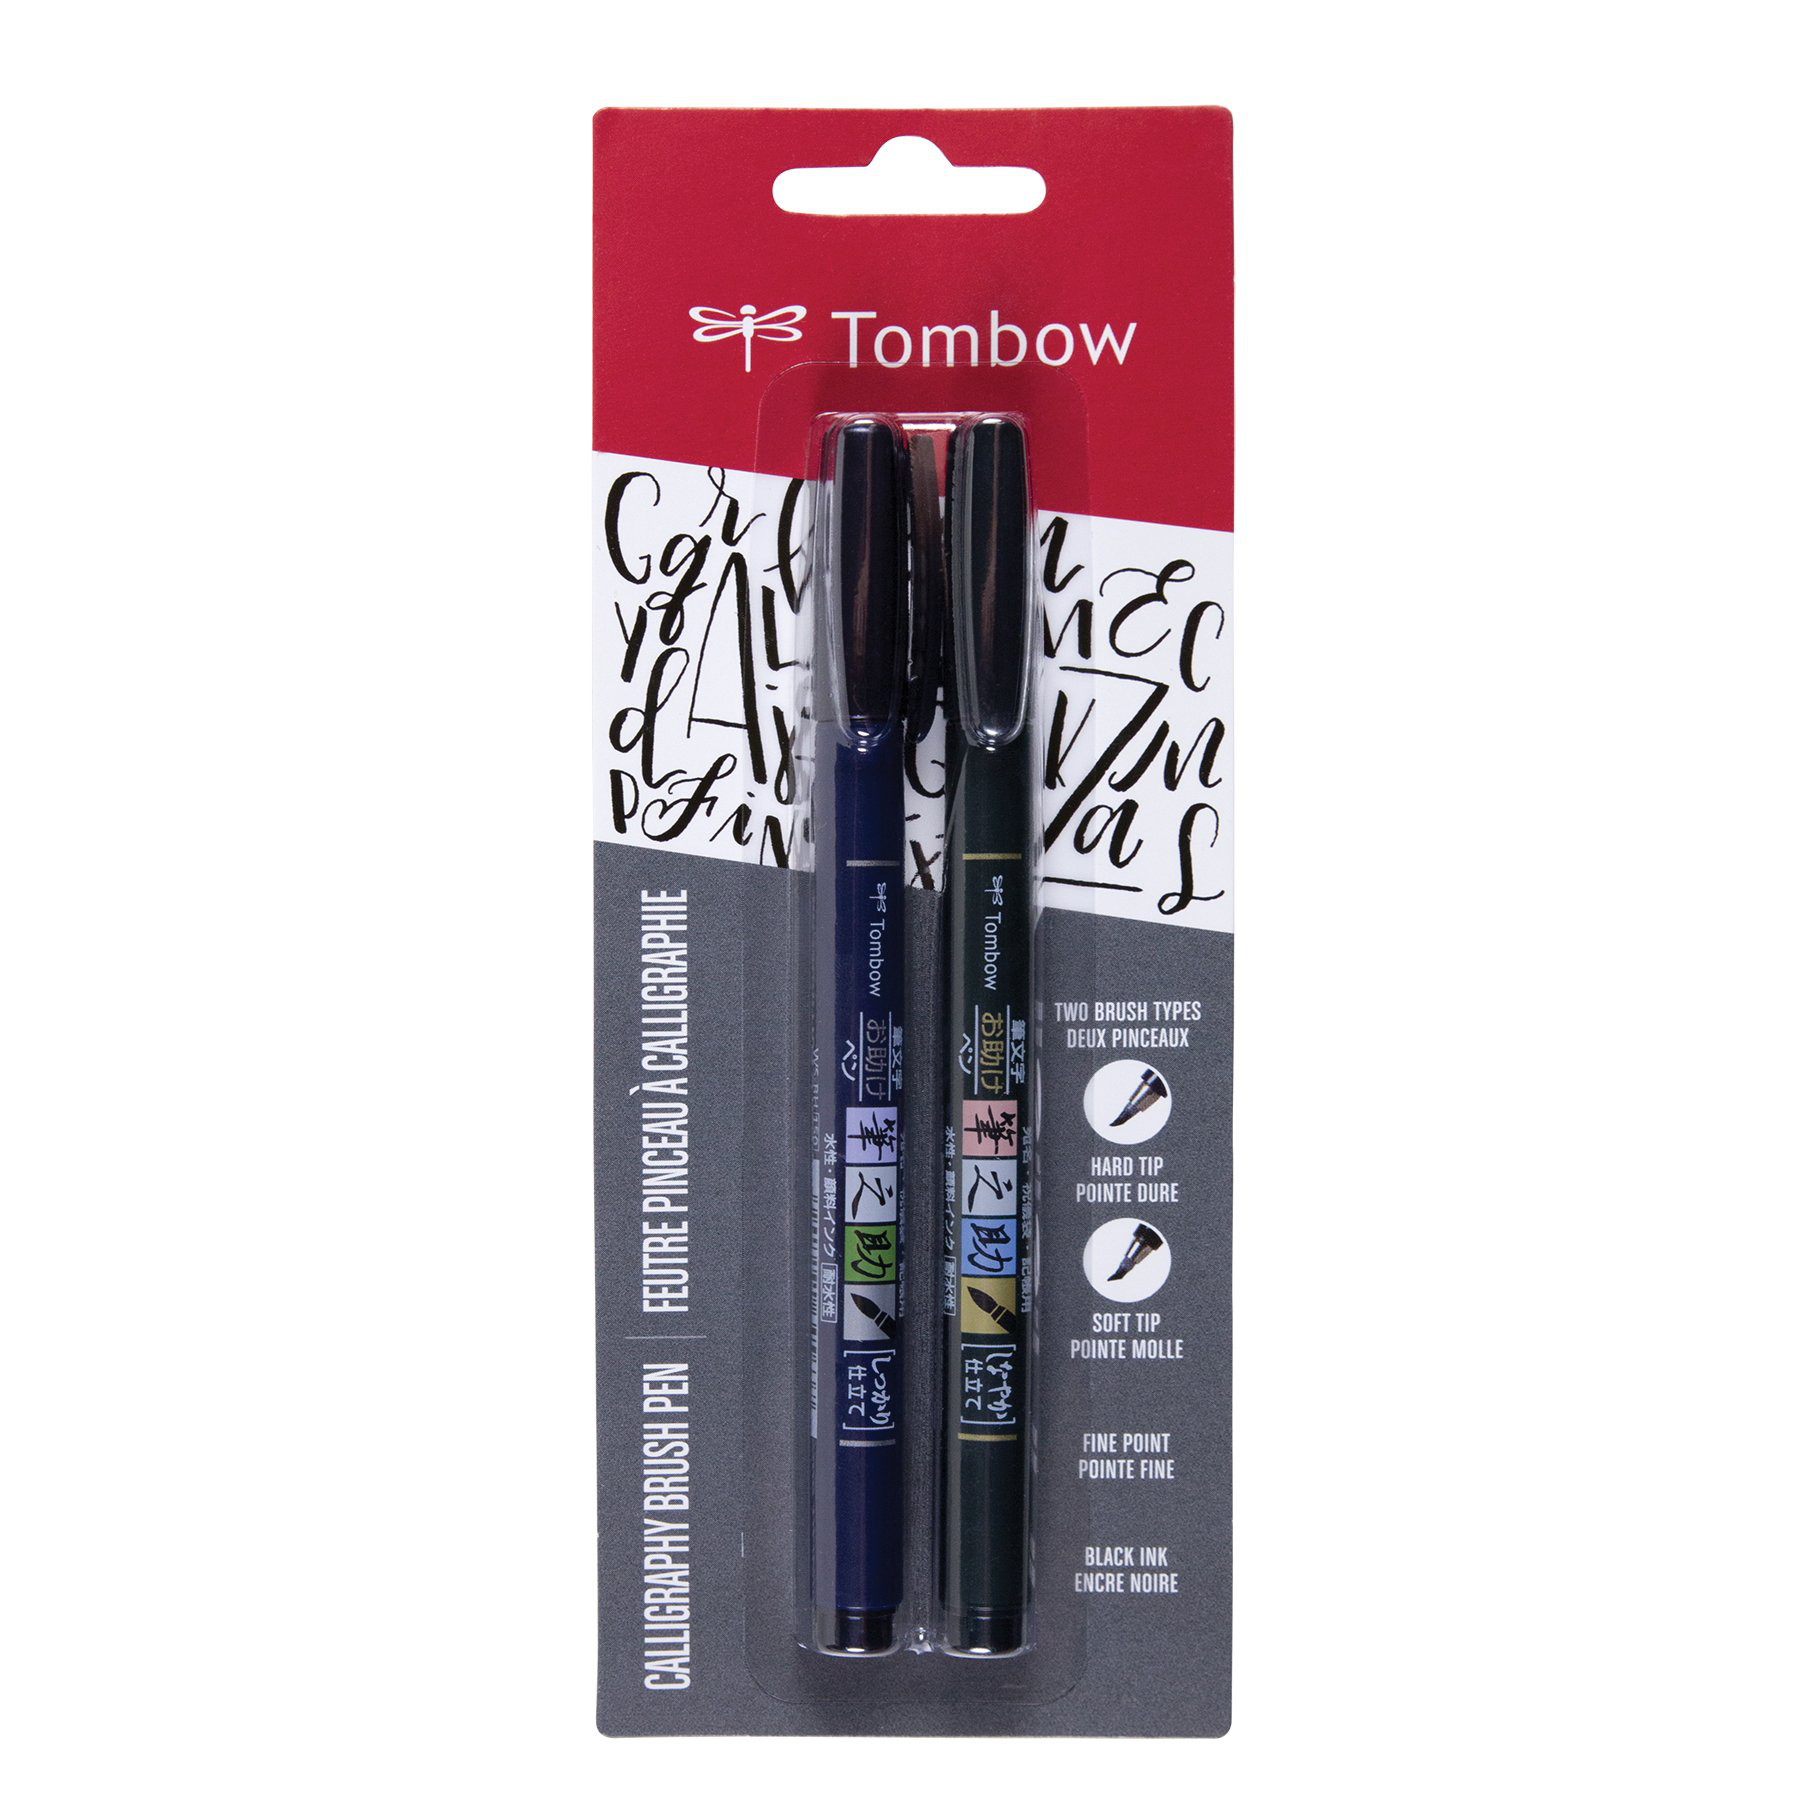

In [112]:
from PIL import Image
import requests
from io import BytesIO
from IPython.display import display

#Sample Product Information
product = products_50[24]
print('Product Title: ', product['title'], '\n')
print('Last price change: ', product['lastPriceChange'], '\n')

image_name = 'https://images-na.ssl-images-amazon.com/images/I/' + (product['imagesCSV'].split(',')[0])
response = requests.get(image_name)
img = Image.open(BytesIO(response.content), 'r')
display(img)

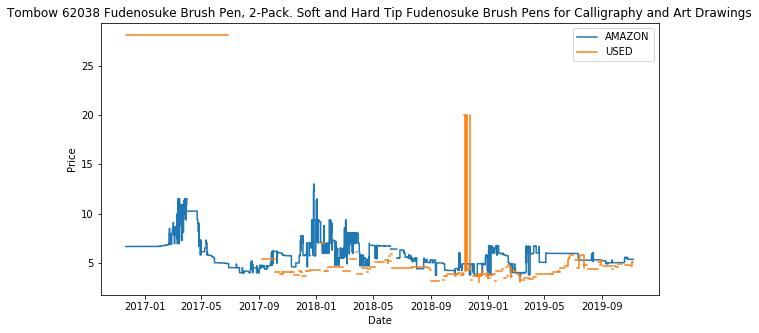

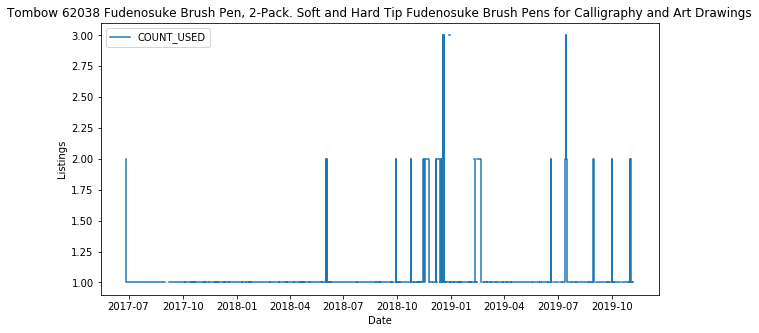

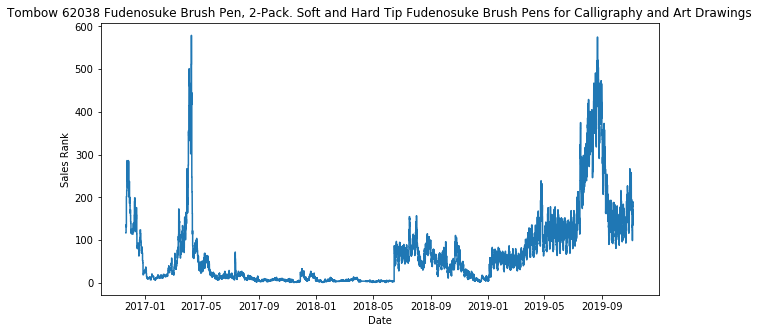

None

<Figure size 432x288 with 0 Axes>

In [111]:
#Example Plot
display(keepa.plot_product(products_50[24]))